# **Preprocessing Single-subject Data**

***

In this single-subject analysis chapter, EEG pre-processing has been divided into the following 8 steps:

- **Step 1: Loading Data**  
- **Step 2: Filtering Data**  
- **Step 3: Rejecting Artifacts**  
- **Step 4: Setting the Reference**  
- **Step 5: Segmenting Data into Epochs**  


# Step 1 Loading Data

### Reading Raw Data

Read EEG data from csv, load it into raw format that can be read by mne, and perform positioning（montage)

In [1]:
import pandas as pd
import numpy as np
import mne
from mne.preprocessing import ICA
from mne.time_frequency import tfr_morlet
import matplotlib.pyplot as plt

def parse_sample_data(sample_data_str):
    sample_data_list = eval(sample_data_str)
    return sample_data_list[:9]

file_path = './test_data/eeg_test.csv'
sfreq = 1024
eeg_full_data = pd.read_csv(file_path)
eeg_samples = np.array([parse_sample_data(row) for row in eeg_full_data['Sample']])
eeg_samples_transposed = eeg_samples.T
ch_names = ['Fp1', 'Fp2', 'Fz', 'F3', 'F4', 'F7', 'F8', 'FC1', 'FC2']
ch_types = ['eeg'] * 9  
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(eeg_samples_transposed , info)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
# raw.info['lowpass'] = 64.0
raw.filter(None, 64.0, fir_design='firwin')

print("load success")

Creating RawArray with float64 data, n_channels=9, n_times=10501
    Range : 0 ... 10500 =      0.000 ...    10.254 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 64 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 64.00 Hz
- Upper transition bandwidth: 16.00 Hz (-6 dB cutoff frequency: 72.00 Hz)
- Filter length: 213 samples (0.208 s)

load success


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


### Checking Raw Data Information

In [2]:
print(raw)
print(raw.info)

<RawArray | 9 x 10501 (10.3 s), ~757 kB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, Fz, F3, F4, F7, F8, FC1, FC2
 chs: 9 EEG
 custom_ref_applied: False
 dig: 12 items (3 Cardinal, 9 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 9
 projs: []
 sfreq: 1024.0 Hz
>


If the EEG data (hat & recording system) you are working with belongs to a specific systems, you might be able to directly use mne.channels.make_standard_montage function to generate channel location information.  
Take the standard international 10-20 system as an example, the corresponding code could be changed as follows:

> montage = mne.channels.make_standard_montage("standard_1020")   

The available montage of channel location information from other systems in MNE can be found at the following website:  
[https://mne.tools/stable/auto_tutorials/intro/40_sensor_locations.html#sphx-glr-auto-tutorials-intro-40-sensor-locations-py](https://mne.tools/stable/auto_tutorials/intro/40_sensor_locations.html#sphx-glr-auto-tutorials-intro-40-sensor-locations-py)

### Visualizing Raw Data

#### Plot raw data waveforms

Using matplotlib as 2D backend.


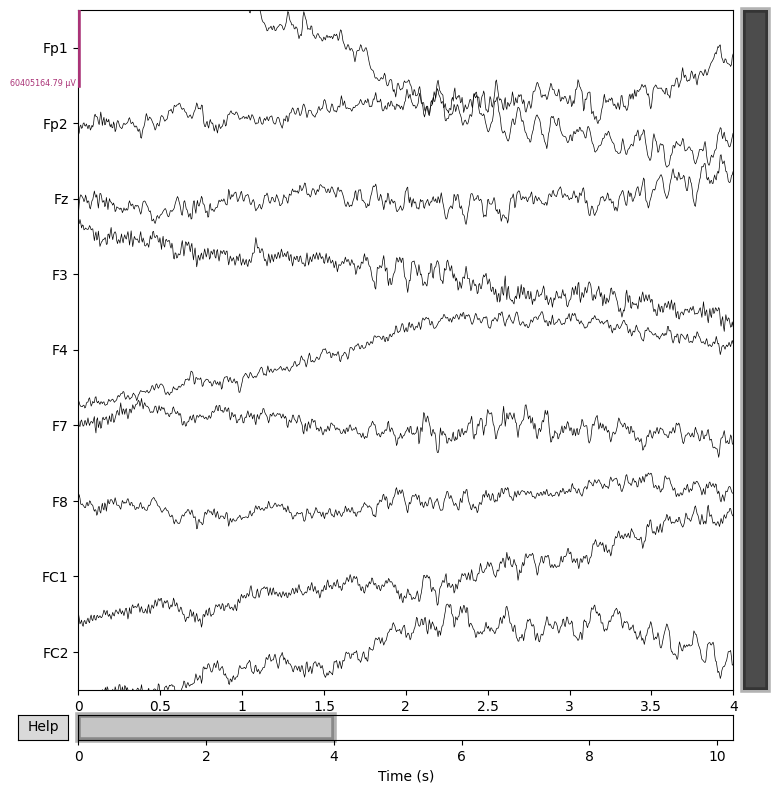

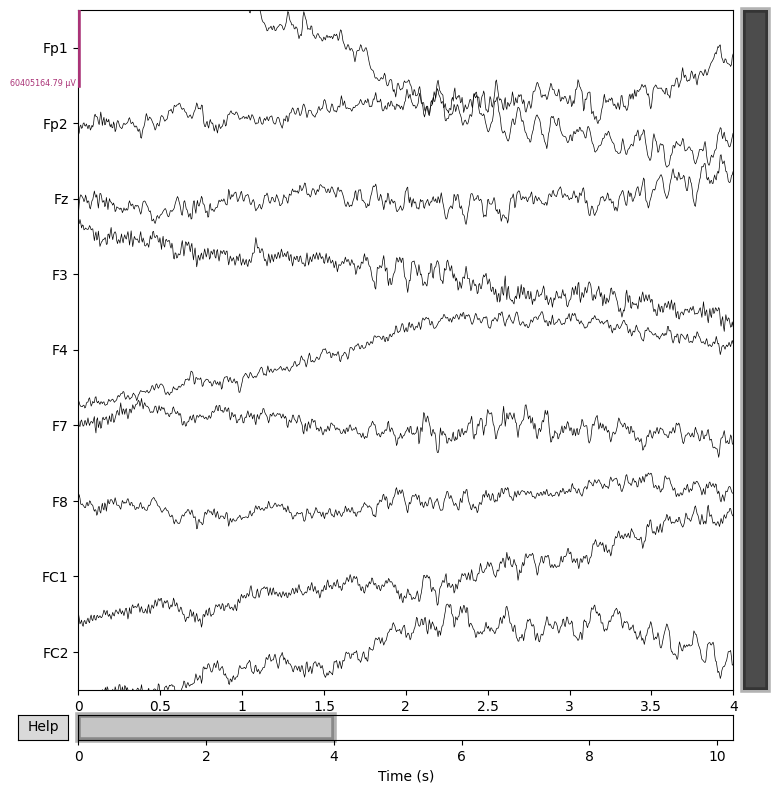

In [3]:
raw.plot(duration=4, n_channels=32, clipping=None, scalings='auto')

#### Plot power spectral density across channels

Effective window size : 2.000 (s)


C:\Users\001\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


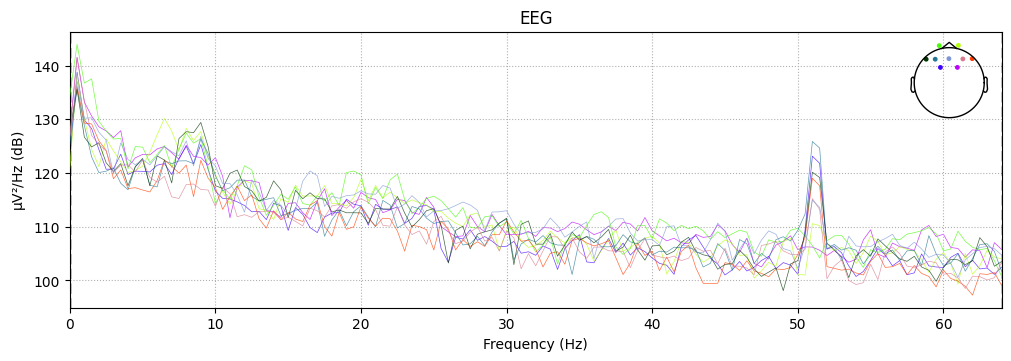

In [5]:
raw.compute_psd(fmin=0, fmax=64).plot()

#### Plot channel-wise frequency spectra as topography

Effective window size : 2.000 (s)


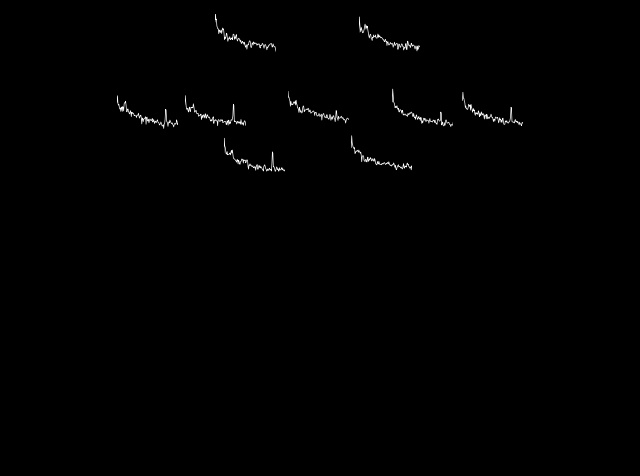

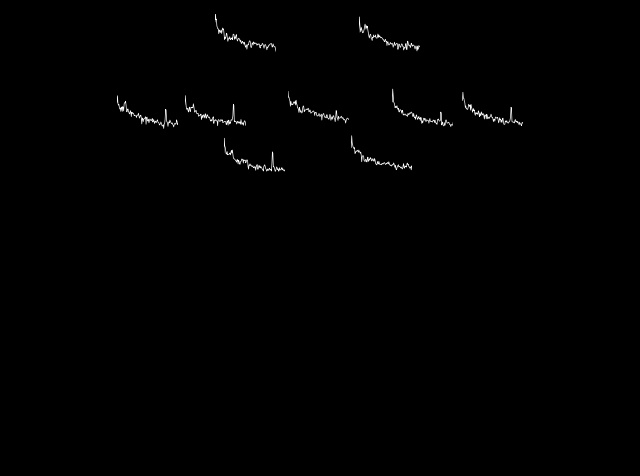

In [7]:
raw.compute_psd(fmin=0, fmax=64).plot_topo()

# Step 2 Filtering Data

Plot the power spectrum

### High/Low-Pass Filtering

In pre-processing, the high-pass filtering is usually a necessary step.  
The most common filtering operation is to use a low-pass filter at 30 Hz and a high-pass filter at 0.1 Hz.  
High-pass filtering is used to eliminate voltage drift, and low-pass filtering is used to eliminate high frequency noises.

In [8]:
raw = raw.filter(l_freq=0.1, h_freq=30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33793 samples (33.001 s)



C:\Users\001\AppData\Local\Temp\ipykernel_26840\4099173238.py:1: RuntimeWarning: filter_length (33793) is longer than the signal (10501), distortion is likely. Reduce filter length or filter a longer signal.
  raw = raw.filter(l_freq=0.1, h_freq=30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


In MNE, the default filtering method is FIR. If you want to use IIR filtering method, you can just modify the parameter method:  
method='fir' by default, using IIR is to set method='iir'.  
The corresponding code is below:

> raw = raw.filter(l_freq=0.1, h_freq=30, method='iir')

Plot the power spectrum

Effective window size : 2.000 (s)


C:\Users\001\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


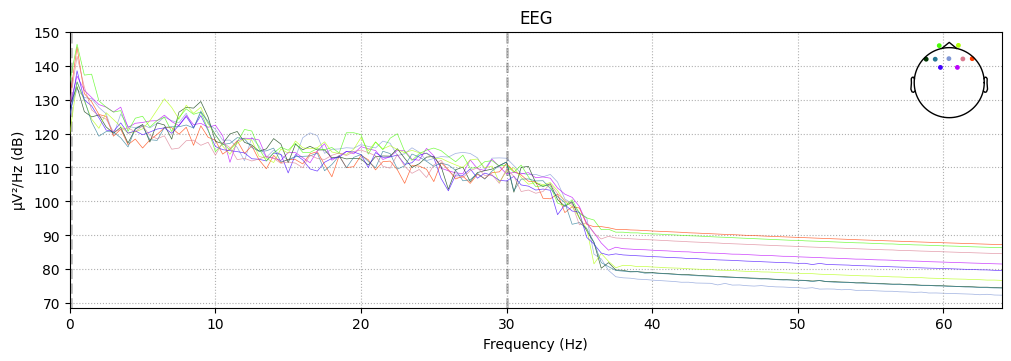

In [12]:
raw.compute_psd(fmin=0, fmax=64).plot()

# Step 3 Rejecting Artifacts

Here we suggest the users to check this website "Overview of artifact detection" from MNE-Python website:  
https://mne.tools/stable/auto_tutorials/preprocessing/10_preprocessing_overview.html  
where they provide detailed introduction about checking EEG data quality and detecting different types of artifacts.

### Remove Bad Segments

Bad segment marking can be done manually via MNE-Python GUI

> fig = raw.plot()  
> fig.fake_keypress('a')

Press 'a' to open this small GUI window, then press 'add new label' to add a marker for marking bad segments  
In MNE, the bad segments will be not deleted directly. But the data will be marked with bad markers.  
In the subsequent data processing, we can set the parameter 'reject_by_annotation' as True in functions to automatically exclude the marked segments while doing data processing.
If you encounter the problem that GUI window isn't pop up, please add the following code on the top of the script.

> import matplotlib  
> matplotlib.use('TkAgg')

**Note**: Not recommend to open GUI in Jupyter notebook (GUI always crashes).

### Remove Bad Channels

The bad channels in MNE will not be deleted directly. MNE just marks the bad channels with 'bads' labels.
In the example below, we assume that channel 'FC5' is bad. Thus, we can mark 'FC5' as 'bads':

In [9]:
# Marking the bad channel
raw.info['bads'].append('FC5')
# Printing the bad channel's name
print(raw.info['bads'])

['FC5']


Of course, we can add multiple bad channels  
For example, if both 'FC5' and 'C3' are bad channels, we can mark them via the following line：
> raw.info['bads'].extend(['FC5', 'C3'])

### Reconstruct Bad Channels

The bad channel reconstruction of MNE is to reconstruct signal of the channels marked as 'bads'

In [10]:
raw = raw.interpolate_bads()

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 29 sensor positions
Interpolating 1 sensors


The 'bads' marker will be removed by default after signal reconstruction.  
If you do not want to remove the markings of the original bad channels, set the reset_bads parameter as False.  
The corresponding code is as follow:

> raw = raw.interpolate_bads(reset_bads=False)

### Independent Components Analysis (ICA)

#### Run ICA

The programming idea of ICA in MNE is to first build an ICA object (which can be understood as building an ICA analyzer) then use this ICA analyzer to analyze the EEG data (through methods of ICA object).  
Since ICA is not effective for low frequency data, here ICA and artifact components removal are based on high-pass 1Hz data and then applied to high-pass 0.1Hz data.

In [6]:
ica = ICA(max_iter='auto')
raw_for_ica = raw.copy().filter(l_freq=1, h_freq=None)
ica.fit(raw_for_ica)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3381 samples (3.302 s)

Fitting ICA to data using 9 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 8 components


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


Fitting ICA took 1.5s.


C:\Users\001\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,1000 iterations on raw data (10501 samples)
ICA components,8
Available PCA components,9
Channel types,eeg
ICA components marked for exclusion,—


We set n_components here, i.e. the number of ICA components which is automatically selected by MNE's ICA analyzer.  
Similar to EEGLAB, if you want the number of ICA components to be fixed, you can customize the setting (n_components<=n_channels).  
Taking 30 independent components as an example, the corresponding code can be changed as follows：

> ica = ICA(n_components=30, max_iter='auto')

#### Plot the timing signal of each component

Creating RawArray with float64 data, n_channels=8, n_times=10501
    Range : 0 ... 10500 =      0.000 ...    10.254 secs
Ready.


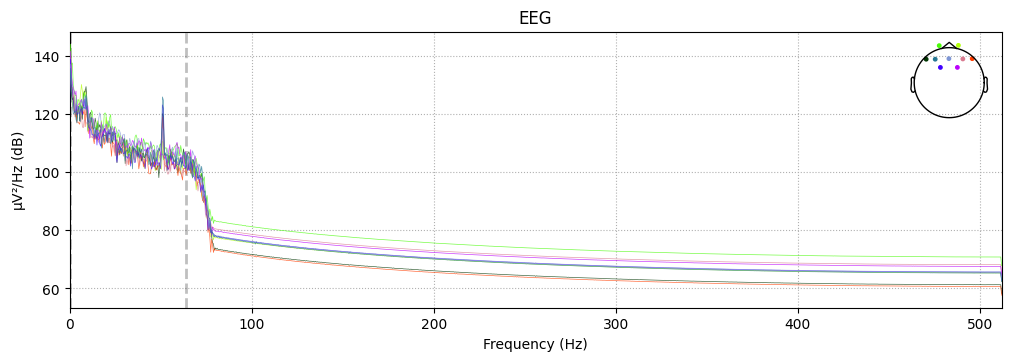

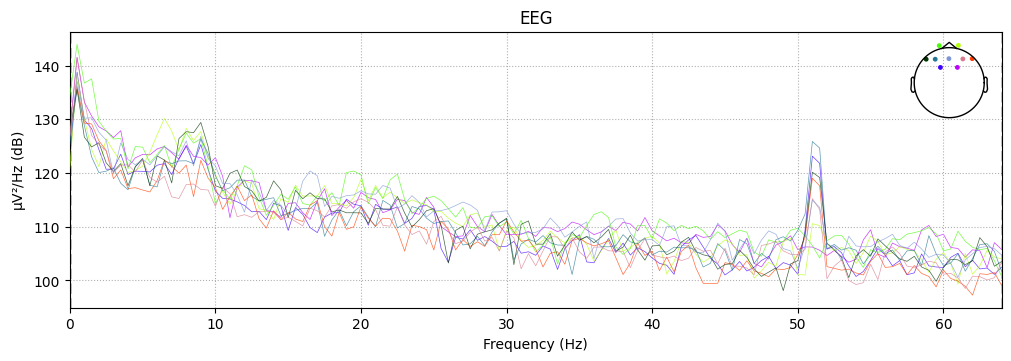

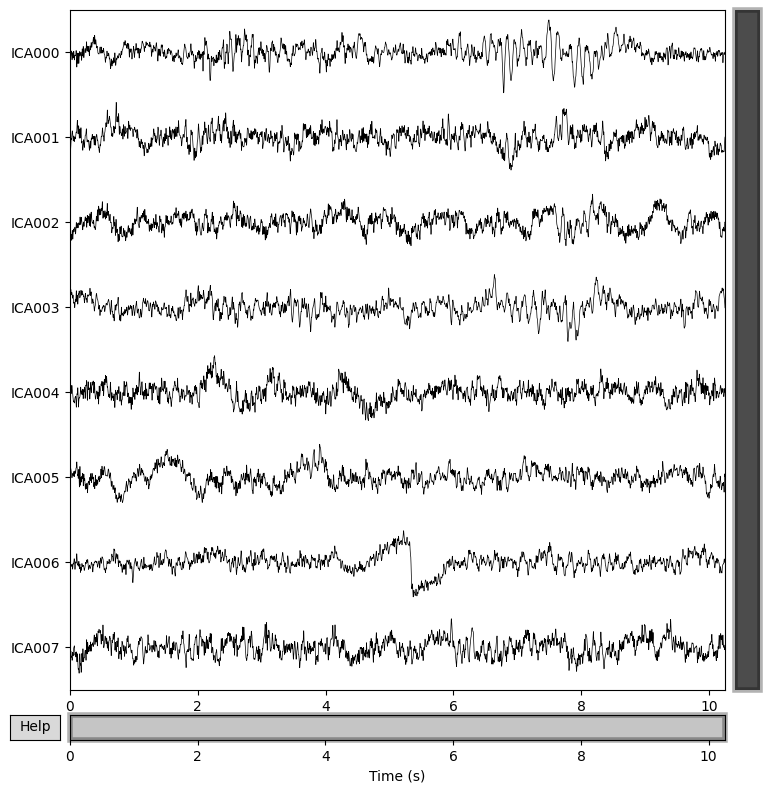

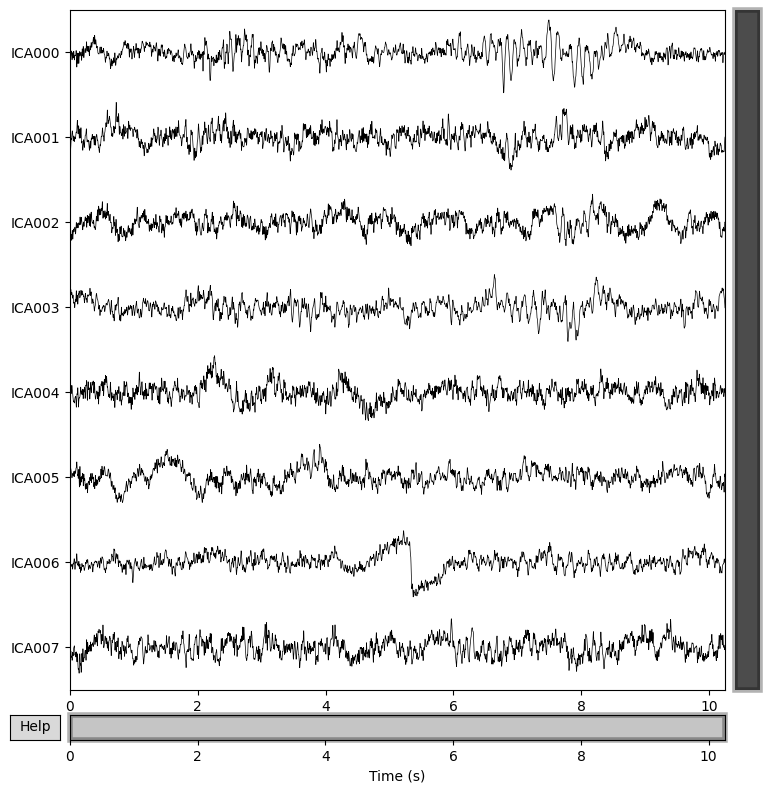

In [7]:
ica.plot_sources(raw_for_ica)

#### Plot the topography of each component

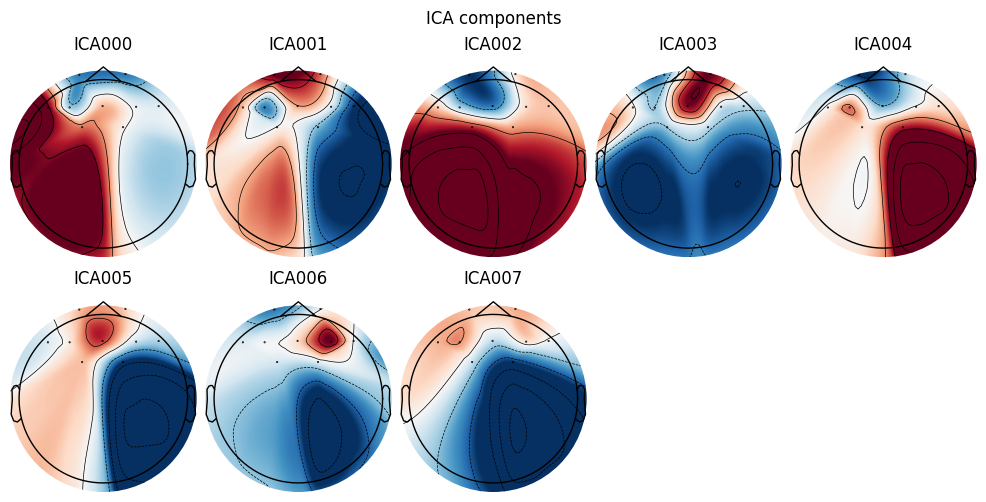

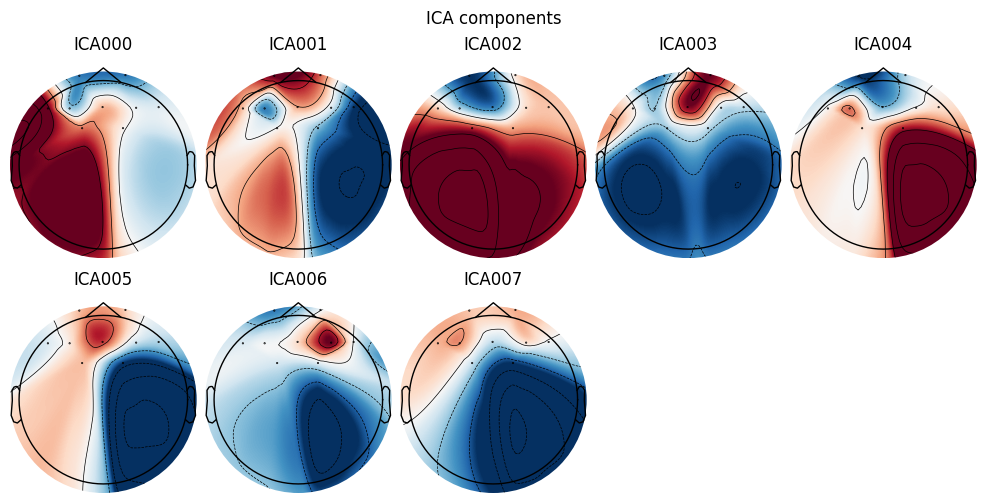

In [8]:
ica.plot_components()

#### Check the signal difference before and after the removal of a component / several component.

Here is an example of removing the 2rd component (i.e. ICA001)

Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 9 PCA components


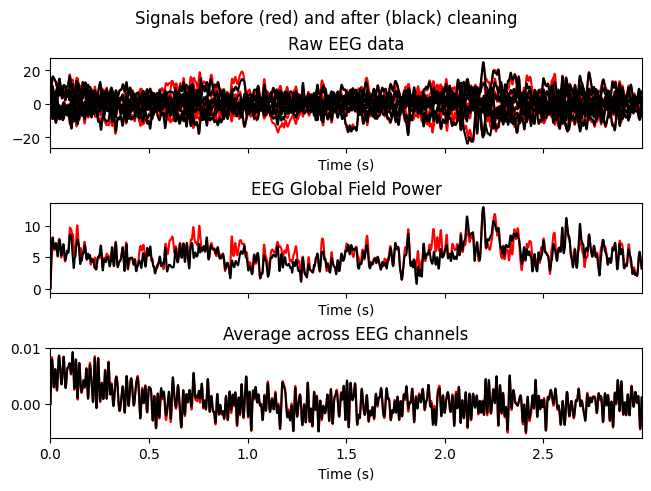

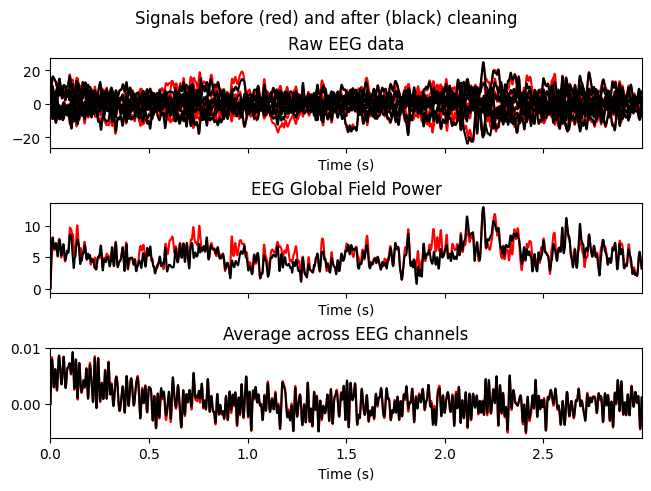

In [9]:
ica.plot_overlay(raw_for_ica, exclude=[1])

#### Visualize each component

In the example, we visualize the 2nd component (ICA001).

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated


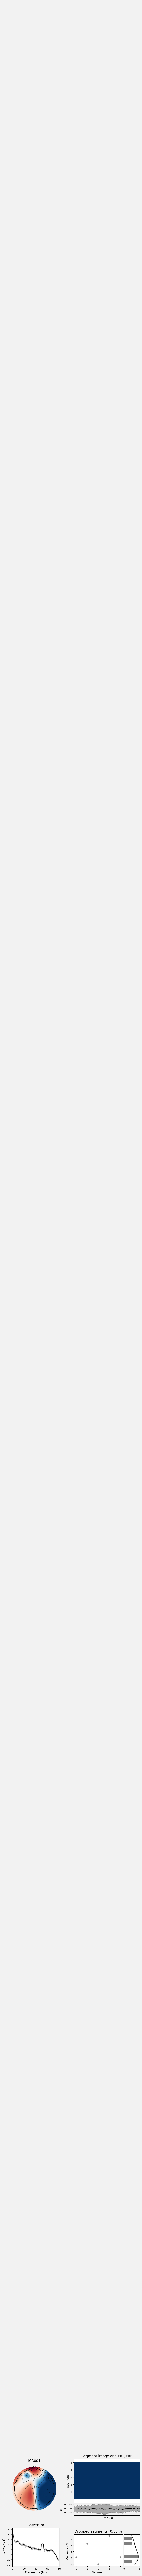

[<Figure size 700x600 with 6 Axes>]

In [11]:
ica.plot_properties(raw, picks=[1])

The power of component ICA001 is higher in the frontal area and is higher at low frequencies, with significant enhancement in some trials.  
It can be judged as an EOG component.

#### Exclude components

In [12]:
# set the component index(es) to exclude
ica.exclude = [1]
# apply to EEG data
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 9 PCA components


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,12 points
Good channels,9 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.00 Hz
Lowpass,64.00 Hz


Plot the waveform of the data after ICA

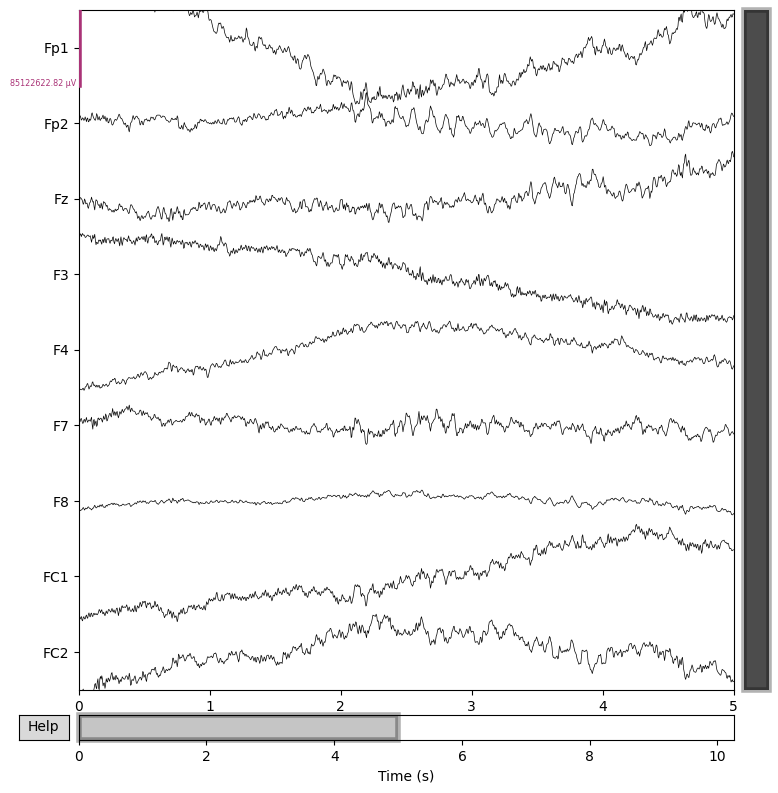

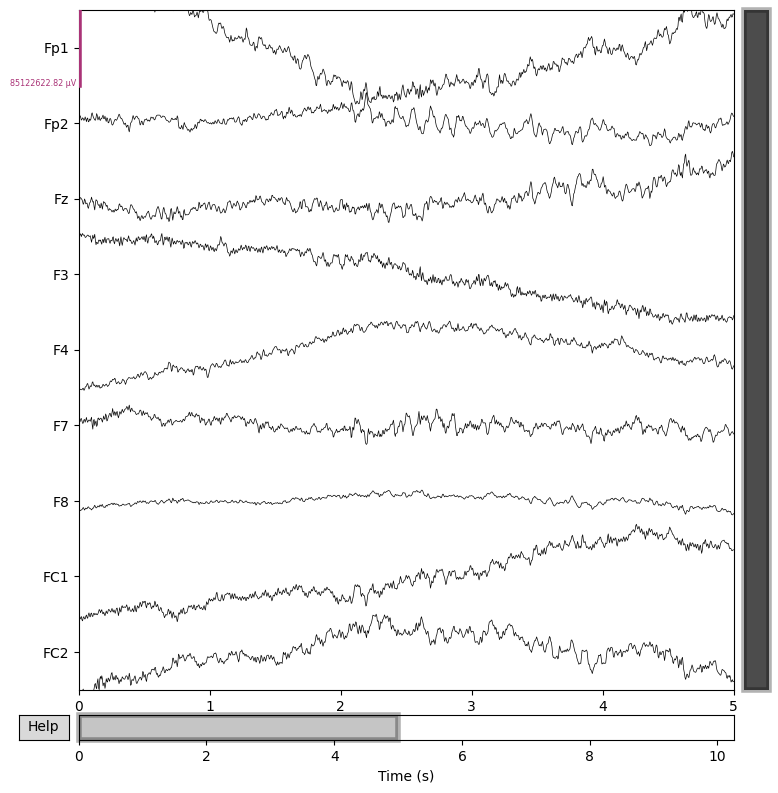

In [14]:
raw.plot(duration=5, n_channels=32, clipping=None,scalings='auto')

# Step 4 Setting the Reference

If you want to use the papillary reference method, usually we use 'TP9' and 'TP10' as reference channels. You could use the following codes:

> raw.set_eeg_reference(ref_channels=['TP9','TP10'])  

If you want to use the average reference method, you could use the following code:

> raw.set_eeg_reference(ref_channels='average')  

If you want to use the REST reference method, you could use the following code：
Here you need to pass in a forward parameter, for details see the corresponding MNE introduction at:
[https://mne.tools/stable/auto_tutorials/preprocessing/55_setting_eeg_reference.html](https://mne.tools/stable/auto_tutorials/preprocessing/55_setting_eeg_reference.html)
> raw.set_eeg_reference(ref_channels='REST', forward=forward)  

If you want to use a bipolar reference method, you could use the following code：
(Here 'EEG X' and 'EEG Y' correspond to the anode and cathode leads used for reference, respectively)

> raw_bip_ref = mne.set_bipolar_reference(raw, anode=['EEG X'], cathode=['EEG Y'])